In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

[CMU Book Summary Dataset](http://www.cs.cmu.edu/~dbamman/booksummaries.html)

In [2]:
!wget http://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz

--2021-01-12 17:10:30--  http://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16795330 (16M) [application/x-gzip]
Saving to: ‘booksummaries.tar.gz.1’

booksummaries.tar.g 100%[===================>]  16.02M  1.23MB/s    in 15s     

2021-01-12 17:10:46 (1.10 MB/s) - ‘booksummaries.tar.gz.1’ saved [16795330/16795330]



In [3]:
df = pd.read_csv('/content/booksummaries.tar.gz', sep='\t', names=['wiki_id', 'freebase_id', 'title', 'author', 'date', 'genres', 'summary'])[16:-1]
df.sample(10)

,wiki_id,freebase_id,title,author,date,genres,summary
8105,7675887,/m/0268kqv,A Fortunate Life,NaN,NaN,"{""/m/0xdf"": ""Autobiography"", ""/m/07s9rl0"": ""Dr...",The autobiography begins at his birth. Albert...
407,133721,/m/0_bnp,The Remains of the Day,Kazuo Ishiguro,1989-05,"{""/m/02xlf"": ""Fiction"", ""/m/0hwxm"": ""Historica...","The Remains of the Day tells, in first person..."
10415,12501516,/m/02w97qz,Bedelia,Vera Caspary,1945,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",33 year-old Charlie Horst comes from an old P...
12448,17971412,/m/047n585,Mrs. God,Peter Straub,NaN,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",The novel concerns a professor who is researc...
8484,8406198,/m/02729m4,See Delphi and Die,Lindsey Davis,2005,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","Through his brother-in-law Aulus, Falco hears..."
13891,22326480,/m/05s_74q,The Productions of Time,John Brunner,1967,NaN,The plot follows Murray Douglas as he joins a...
11699,15957491,/m/03qj7jv,The Dead of Jericho,Colin Dexter,1981-06-04,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",Detective Chief Inspector E. Morse of the Tha...
6474,5357383,/m/0dh6g1,Twilight's Child,V. C. Andrews,1992-02,"{""/m/039vk"": ""Gothic fiction"", ""/m/03mfnf"": ""Y...",Dawn and Jimmy arrange to find out what happe...
1716,843542,/m/03g9rl,Roderick,John Sladek,1980-11-13,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","The title character is an intelligent robot, ..."
4524,3305645,/m/094l4_,The Fifty Year Sword,Mark Z. Danielewski,2005-10-31,"{""/m/0707q"": ""Short story""}",The Fifty Year Sword is essentially a mature-...


In [4]:
train, temp = train_test_split(df, train_size = 0.8, random_state = 1)
test, val = train_test_split(temp, train_size = 0.5, random_state = 1)
print(f'Train set volume: {len(train)} \nValidation set volume: {len(val)} \nTest set volume: {len(test)}')

Train set volume: 13247 
Validation set volume: 1656 
Test set volume: 1656


In [5]:
def dataset(path):
    texts = df['summary'].tolist() # needed texts
    data = ''
    f = open(path, 'w')

    for text in texts:
        
        text = str(text).strip() 
        text = re.sub(r"\s", " ", text)
        start = '<s> '
        end = ' </s>'
        data += start + text + end + '\n' # compile the set 

    f.write(data)
    return data

def split_set(split_set):
  split_set = dataset(split_set)
  split_set = split_set.split('\n')
  
  return split_set

In [6]:
val_set = split_set('val.txt')
train_set = split_set('train.txt')
test_set = split_set('test.txt')

In [7]:
print(test_set[0][:50], ' ... ', test_set[0][-50:])

<s> Old Major, the old boar on the Manor Farm, cal  ...  ogma can be turned into malleable propaganda. </s>


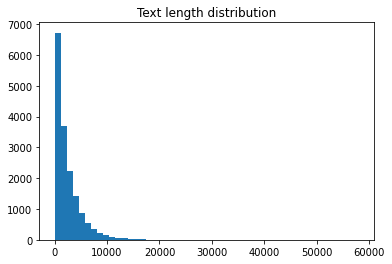

In [8]:
plt.title('Text length distribution')
plt.hist(list(map(len, train_set)), bins=50);